In [1]:
import numpy as np
import os
import pandas as pd

from sklearn.cluster import KMeans
import random

In [2]:
## load preprocessed feature datasets
dielect = pd.read_csv("./dielectric_feature.csv")
kvrh = pd.read_csv("./kvrh_features.csv")
gvrh = pd.read_csv("./gvrh_features.csv")
perov = pd.read_csv("./perov_features.csv")

mat_dielect = pd.read_csv("./mat_dielectric_feature.csv")
mat_elast = pd.read_csv("./mat_elast_feature.csv")

In [3]:
dielect

,composition,target,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,KS,1.752064,45.500000,35.581650,362.445000,8.500000,3.500000,154.000000,1.700000,1.500000,...,3.500000,0.500000,1.000000,0.000000,0.0,1.500000,49.446771,1.101000,0.000000,149.500000
1,K3VO4,1.652859,35.000000,42.132537,1224.548750,4.875000,3.750000,160.875000,1.552500,1.625000,...,3.625000,0.375000,0.250000,3.500000,0.0,4.125000,35.058125,0.000000,0.000000,201.875000
2,Rb2ZrO3,1.867858,58.833333,52.652333,788.810000,9.500000,3.500000,128.000000,2.300000,1.833333,...,4.500000,0.166667,1.000000,2.666667,0.0,3.833333,27.404583,0.000000,0.000000,108.833333
3,MnOF,2.676887,77.333333,29.978616,542.433333,13.333333,2.666667,87.333333,2.990000,2.000000,...,6.666667,0.000000,1.000000,1.666667,0.0,2.666667,9.766695,0.656667,0.000103,81.333333
4,Li2CoSiO4,1.793232,64.500000,31.643599,1349.061250,11.375000,3.000000,111.250000,1.972500,1.875000,...,5.125000,0.125000,2.250000,0.750000,0.0,3.125000,15.993542,0.386500,0.387118,192.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,Cr2O5,2.458294,76.142857,26.284171,662.000000,13.142857,2.571429,86.857143,2.931429,1.714286,...,6.000000,0.285714,1.428571,1.428571,0.0,3.142857,9.700714,0.000000,0.000000,74.000000
3988,Ca2FeWO6,2.136837,48.200000,61.506540,1684.580000,7.400000,4.000000,137.200000,1.878000,2.000000,...,7.800000,0.000000,0.200000,3.000000,0.0,3.200000,16.507500,0.000000,1.266398,206.500000
3989,La4MnS6O,2.690619,69.250000,40.559921,665.513333,11.916667,3.083333,105.333333,2.543333,2.000000,...,6.083333,0.000000,1.166667,2.416667,0.0,3.583333,13.272060,0.183500,0.000103,100.333333
3990,BaAg2GeSe4,2.811494,55.750000,107.215850,1080.640000,9.750000,5.000000,156.250000,1.757500,1.500000,...,9.750000,0.500000,0.750000,0.000000,0.0,1.250000,30.178125,0.147750,0.000000,199.625000


In [4]:
def kmeans(df, k):
    '''
    Get clusters according to material features
    ########
    Arguments:
    df: loaded preprocessing data
    k: random seed
    '''
    if len(df) > 4500:
        random.seed(k)
        idx = random.sample(range(len(df)), 4500) 
        df = df.loc[idx]
        
    X = df.drop(columns=["composition", "target"]).values
    print(X.shape)
    kk = KMeans(n_clusters=10, random_state=0)
    kk.fit(X)
    df["label"] = kk.labels_
    
    return df

In [5]:
dielect_new = kmeans(dielect,1)
kvrh_new = kmeans(kvrh,3)
gvrh_new = kmeans(gvrh,4)
perov_new = kmeans(perov,5)

mat_dielect_new = kmeans(mat_dielect,7)
mat_elast_new = kmeans(mat_elast,8)

(3992, 21)


/home/nihang/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(4500, 21)


/home/nihang/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(4500, 21)


/home/nihang/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(4500, 21)


/home/nihang/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(964, 21)


/home/nihang/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(1087, 21)


/home/nihang/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
dielect_new

,composition,target,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,label
0,KS,1.752064,45.500000,35.581650,362.445000,8.500000,3.500000,154.000000,1.700000,1.500000,...,0.500000,1.000000,0.000000,0.0,1.500000,49.446771,1.101000,0.000000,149.500000,2
1,K3VO4,1.652859,35.000000,42.132537,1224.548750,4.875000,3.750000,160.875000,1.552500,1.625000,...,0.375000,0.250000,3.500000,0.0,4.125000,35.058125,0.000000,0.000000,201.875000,7
2,Rb2ZrO3,1.867858,58.833333,52.652333,788.810000,9.500000,3.500000,128.000000,2.300000,1.833333,...,0.166667,1.000000,2.666667,0.0,3.833333,27.404583,0.000000,0.000000,108.833333,5
3,MnOF,2.676887,77.333333,29.978616,542.433333,13.333333,2.666667,87.333333,2.990000,2.000000,...,0.000000,1.000000,1.666667,0.0,2.666667,9.766695,0.656667,0.000103,81.333333,8
4,Li2CoSiO4,1.793232,64.500000,31.643599,1349.061250,11.375000,3.000000,111.250000,1.972500,1.875000,...,0.125000,2.250000,0.750000,0.0,3.125000,15.993542,0.386500,0.387118,192.125000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,Cr2O5,2.458294,76.142857,26.284171,662.000000,13.142857,2.571429,86.857143,2.931429,1.714286,...,0.285714,1.428571,1.428571,0.0,3.142857,9.700714,0.000000,0.000000,74.000000,5
3988,Ca2FeWO6,2.136837,48.200000,61.506540,1684.580000,7.400000,4.000000,137.200000,1.878000,2.000000,...,0.000000,0.200000,3.000000,0.0,3.200000,16.507500,0.000000,1.266398,206.500000,1
3989,La4MnS6O,2.690619,69.250000,40.559921,665.513333,11.916667,3.083333,105.333333,2.543333,2.000000,...,0.000000,1.166667,2.416667,0.0,3.583333,13.272060,0.183500,0.000103,100.333333,5
3990,BaAg2GeSe4,2.811494,55.750000,107.215850,1080.640000,9.750000,5.000000,156.250000,1.757500,1.500000,...,0.500000,0.750000,0.000000,0.0,1.250000,30.178125,0.147750,0.000000,199.625000,7


In [9]:
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmp

from sklearn.manifold import TSNE

In [10]:
def tsneX(X):
    '''
    Apply t-SNE for 2 dimensionality reduction
    ########
    Arguments:
    X: processed data with label
    '''
    ll = X["label"].values
    #print(ll)
    X = X.drop(columns=["composition", "target", "label"]).values

    
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    print(X_tsne.shape)
    
    X_tsne = pd.DataFrame(np.concatenate((X_tsne,np.array([ll]).T), axis=1), columns = ["X","Y","label"])
    
    return X_tsne

In [11]:
dielect_tsne = tsneX(dielect_new)
kvrh_tsne = tsneX(kvrh_new)
gvrh_tsne = tsneX(gvrh_new)
perov_tsne = tsneX(perov_new)

mat_dielect_tsne = tsneX(mat_dielect_new)
mat_elast_tsne = tsneX(mat_elast_new) 

(3992, 2)
(4500, 2)
(4500, 2)
(4500, 2)
(964, 2)
(1087, 2)


In [12]:
dielect_tsne

,X,Y,label
0,-47.617836,0.152522,2.0
1,30.348204,12.170692,7.0
2,10.127969,-23.674582,5.0
3,-17.887009,36.466595,8.0
4,28.125769,37.356682,3.0
...,...,...,...
3987,7.583401,3.285380,5.0
3988,64.286041,21.653616,1.0
3989,5.293495,2.854980,5.0
3990,43.989178,-9.254365,7.0


In [13]:
colors = plt.cm.get_cmap('RdYlBu', 10) # get 10 colors from rainbow palette

import seaborn as sns
colors = sns.cubehelix_palette(10)
colors = sns.cubehelix_palette(10, start=.5, rot=-.75)
colors = sns.color_palette("RdBu_r", 10)

In [17]:
def tsnePlot(X, savename):
    '''
    t-SNE plot
    ########
    Arguments:
    X: processed data (2D + label)
    savename: the figure name that you want to save
    '''
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    
    for i in range(10):
        ax.scatter(X[X["label"]==i].iloc[:, 0], X[X["label"]==i].iloc[:, 1], s=10, c=colors[i])
   
    plt.xticks(fontproperties = 'Times New Roman', fontsize=14)
    plt.yticks(fontproperties = 'Times New Roman', fontsize=14)
    
    plt.xlabel('t-SNE 1', fontdict={'family' : 'Times New Roman', 'size':18})
    plt.ylabel('t-SNE 2', fontdict={'family' : 'Times New Roman', 'size':18})

    
    maxx, minn = max(X["X"].max(), X["Y"].max()), min(X["X"].min(), X["Y"].min())

    plt.xlim([minn-5, maxx+5])
    plt.ylim([minn-5, maxx+5])
    
    ## save or not
    # plt.savefig(savename,dpi=1000,bbox_inches = 'tight')
    
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

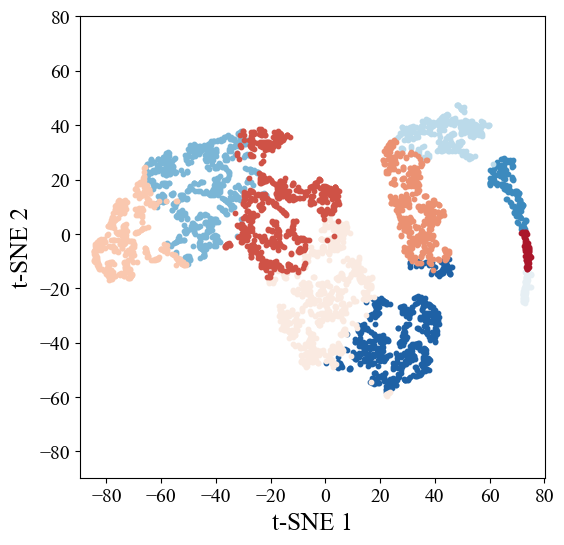

In [18]:
tsnePlot(dielect_tsne, "dielect_cluster.pdf")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

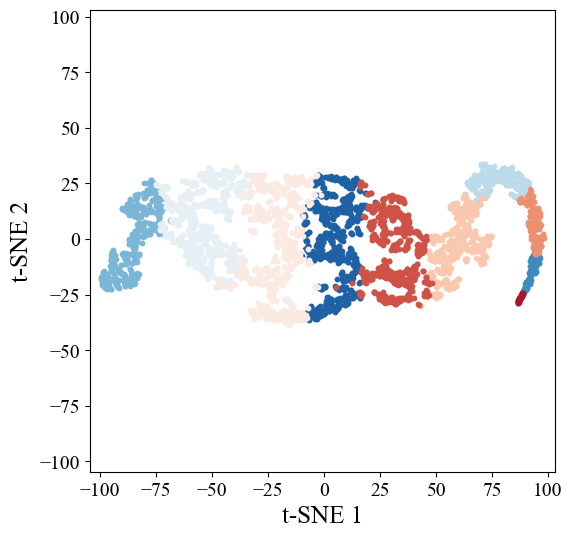

In [19]:
tsnePlot(perov_tsne, "perov_cluster.pdf")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

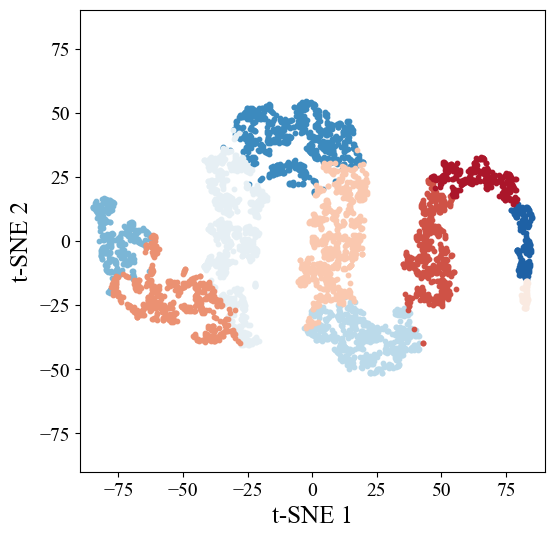

In [20]:
tsnePlot(gvrh_tsne, "gvrh_cluster.pdf")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

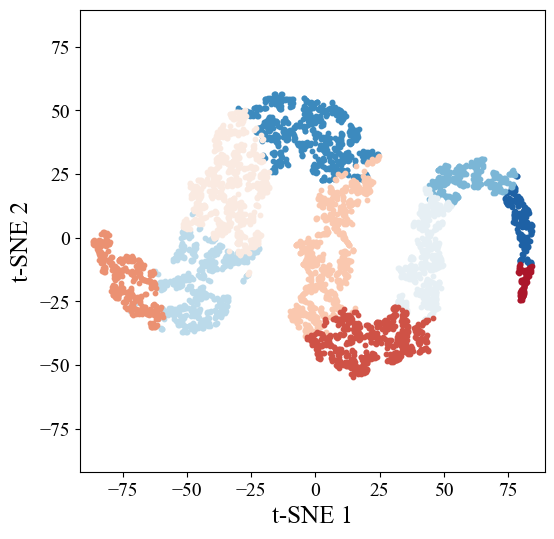

In [21]:
tsnePlot(kvrh_tsne, "kvrh_cluster.pdf")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

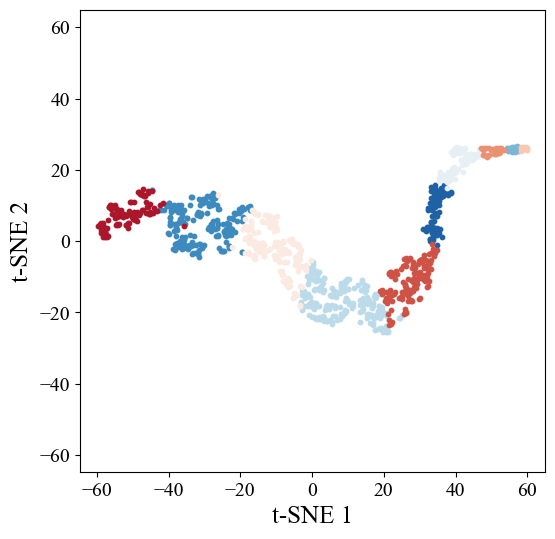

In [22]:
tsnePlot(mat_dielect_tsne, "matminer_dielectric_cluster.pdf")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

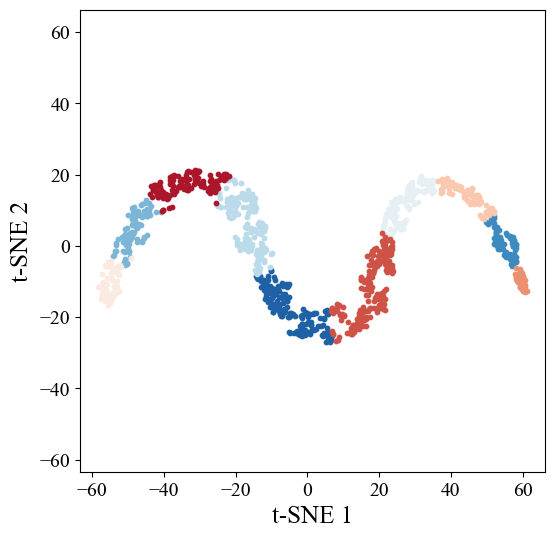

In [23]:
tsnePlot(mat_elast_tsne, "mat_elast_cluster.pdf")

## cluster OOD

In [28]:
def saveOOD(df, name):
    '''
    Each cluster in a dataset can be viewed as a OOD set with respect to the other clusters 
    ########
    Arguments:
    df: data with cluster label
    name: dataset name
    '''
    X = df[["composition", "target", "label"]]
    
    ## create folder
    file_path = os.path.join("./cluster10/", name)
    if not os.path.exists(file_path):
        os.makedirs(file_path)
    
    for i in range(10):
        idx = X.index[X["label"]==i]
        ood = X.loc[idx][["composition", "target"]].reset_index().rename(columns={'index':'material_id'})
        rest = X.drop(idx)[["composition", "target"]].reset_index().rename(columns={'index':'material_id'})
        
        ood.to_csv(os.path.join("./cluster10/", name, f"{name}_ood{i}.csv"), index=None)
        rest.to_csv(os.path.join("./cluster10/", name, f"{name}_{i}.csv"), index=None)

In [29]:
saveOOD(dielect_new, "dielectric")

In [30]:
saveOOD(perov_new, "perov")
saveOOD(kvrh_new, "kvrh")
saveOOD(gvrh_new, "gvrh")

saveOOD(mat_dielect_new, "matminer_dielectric")
saveOOD(mat_elast_new, "matminer_elast")